<center><img src="https://img.freepik.com/free-photo/luxury-bedroom-suite-resort-high-rise-hotel-with-working-table_105762-1783.jpg?w=740&t=st=1654505493~exp=1654506093~hmac=fc1167df2b3797e32400448b458fd80afb85e31403c7689e0b1506023ff754a7" width="720"></center>



<center><font size=6>Hotel Booking Cancellation Prediction</font></center>
<center><font size=6>presented by Rolando López Nieto</font></center>


## 1. PROBLEM STATEMENT

### 1.1. Context

Many hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which benefits hotel guests. Still, it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.


The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### 1.2. My understanding of the Problem definition:

The INN Hotels Group, a chain of hotels in Portugal, is experiencing a high rate of booking cancellations. These cancellations result in significant financial losses due to lost revenue, additional costs for distribution channels, and reduced profit margins from last-minute price reductions. The increasing use of online booking platforms has further complicated customer behavior, making it more challenging to manage this issue.

Objective

The main goal is to develop a data-driven solution to predict which hotel bookings are likely to be canceled. Using the provided dataset, we need to:
Analyze the key factors that influence booking cancellations.

* Analyze the key factors that influence booking cancellations.
* Build a predictive model that can forecast cancellations in advance.
* Propose policies for cancellations and refunds based on the model's insights to help the hotel group improve profitability.

Essentially, this is a binary classification problem where we'll use customer and booking attributes to classify a booking as either "Canceled" or "Not Canceled." Our work will directly help the INN Hotels Group proactively manage their bookings and mitigate financial losses.

## 2. PREP

### 2.1. Importing the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Library for computing permutation feature importance
from sklearn.inspection import permutation_importance

# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# for hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform, loguniform

# to display markdown
from IPython.display import Markdown, display

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### 2.2. Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
hotel = pd.read_csv("/content/drive/MyDrive/Education/DBA AI/M08 ML II/project 08_ML II/INNHotelsGroup.csv")

# keeping a copy of the original df
data = hotel.copy()

### 2.3. Globals

In [ ]:
# to store metrics from all models
models_comparison = pd.DataFrame(columns=["model_name", "split", "accuracy", "precision", "recall", "f1"])

# for hyper-parameter tunning
gbl_random_state = 42
gbl_num_iter = 10
gbl_cv = 5
gbl_scoring = 'recall'

## 3. DATA OVERVIEW

* Observations
* Sanity checks

In [ ]:
# looking at the shape of the dataset
data.shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 36275 rows and 19 columns.


In [ ]:
# first 5 rows
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# last 5 rows
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
# checking the data types of the columns
data.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [ ]:
# checking for duplicate values
data.duplicated().sum()
print(f"The dataset has {data.duplicated().sum()} duplicate rows.")

The dataset has 0 duplicate rows.


In [ ]:
# checking for missing values
data.isnull().sum()
print(f"The dataset has {data.isnull().sum().sum()} missing values.")

The dataset has 0 missing values.


In [ ]:
# statistical summary of data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN36275,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


In [ ]:
# dropping the 'Booking_ID' column
data.drop('Booking_ID', axis=1, inplace=True)

The dataset has 36,275 rows and 18 columns. Most bookings are for 2 adults with no children, typically for short stays. The average lead time is about 85 days, and most bookings occurred in 2018. The majority of guests booked 'Meal Plan 1' and 'Room Type 1' through the 'Online' market segment, with very few being repeated guests or requiring parking. Most bookings have no previous cancellations and no special requests. The average price per room is around 103.42 euros, but there's a wide price range, including some bookings with a price of 0. The target variable, booking_status, shows that 'Not_Canceled' is the most frequent outcome.

## 4. EXPLORATORY DATA ANALYSIS (EDA)


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

EDA Questions:
* What are the busiest months in the hotel?
* Which market segment do most of the guests come from?
* Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
* What percentage of bookings are canceled?
* Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
* Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Note: These are a few questions to help guide you in performing EDA. EDA has to be done beyond this set of questions to obtain the maximum point in the corresponding rubric section.

### 4.0. functions

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to create a stacked barplot

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart with percentages

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))

    for c in ax.containers:
        labels = [f'{w*100:.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center')

    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

### 4.1. Uni-variate analysis

#### 4.1.1. Observations on booking status

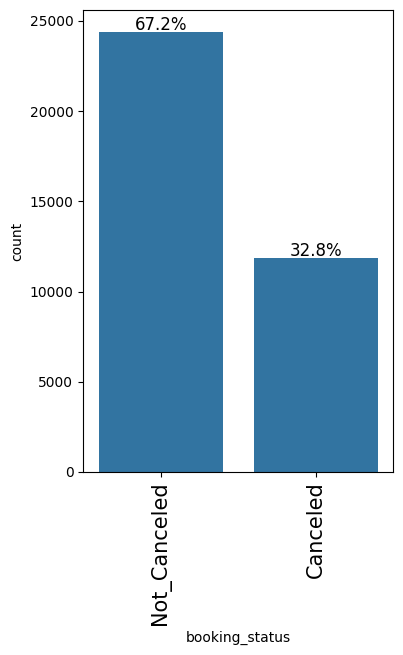

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

Cancelled bookings are almost half (32%) of the not_cancelled (67%). Target variable is inbalanced

#### 4.1.2. Observations on lead time

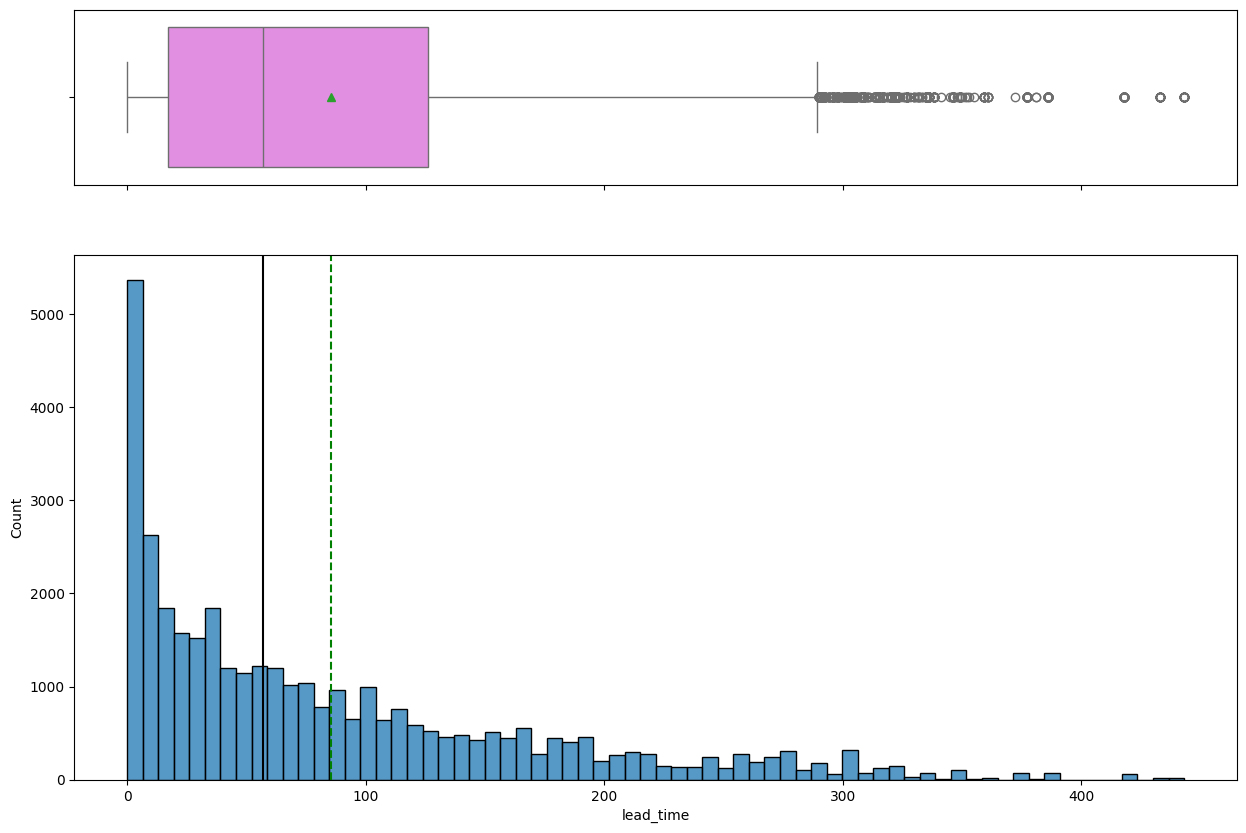

In [ ]:
histogram_boxplot(data, "lead_time")

The 'lead_time' is a highly skewed numerical feature with a high concentration of values at the lower end. While most bookings are made with a short lead time, there is a substantial number of bookings with very long lead times, which are represented as outliers. This variable will likely be a significant factor in predicting booking cancellations, as bookings made far in advance might have a higher probability of being canceled due to changing plans.

#### 4.1.3. Observations on room price

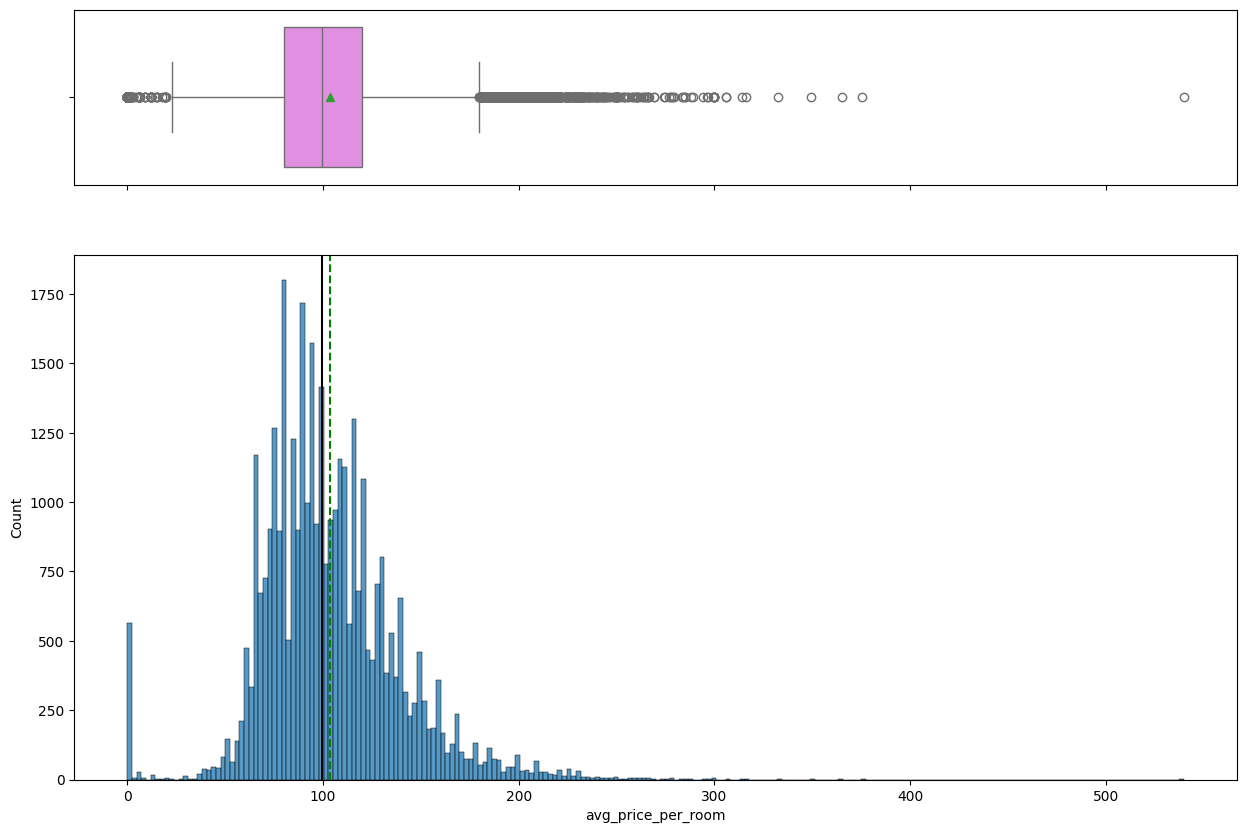

In [ ]:
histogram_boxplot(data, "avg_price_per_room")

The 'avg_price_per_room variable' is generally well-behaved, with most booking prices clustered symmetrically around a median of approximately 100 Euros. However, it does contain a significant number of outliers representing bookings with very high prices

#### 4.1.4. Observations on market_segment_type

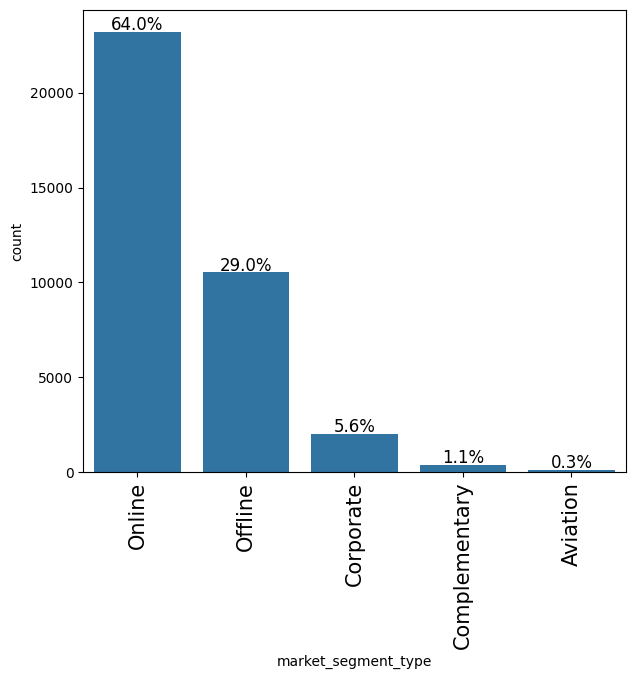

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

The "Online" market segment is the most dominant, accounting for a substantial 64.0% of all bookings.
The "Offline" segment is the second largest, but significantly smaller than "Online" at 29.0%.
The remaining segments, "Corporate" (5.6%), "Complementary" (1.1%), and "Aviation" (0.3%), represent a very small proportion of the total bookings.

#### 4.1.5. Observations on no_of_week_nights

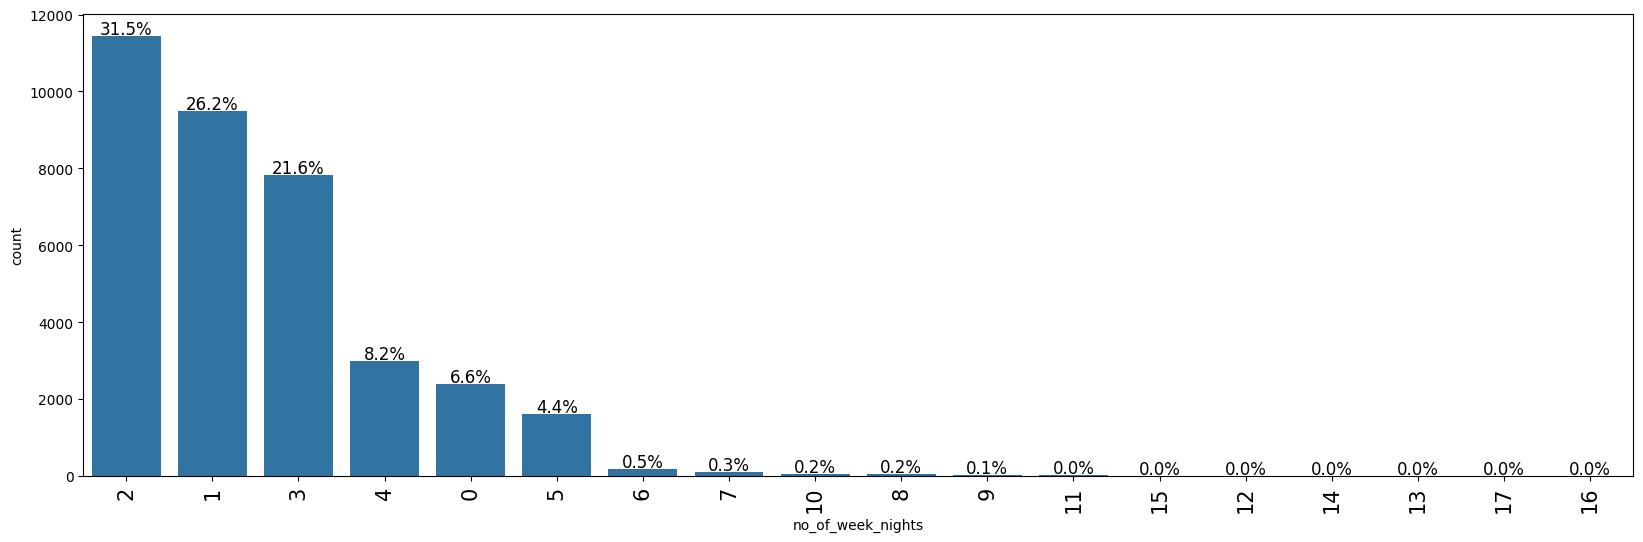

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)

Most of the reservations are for 1-3 week nights, summing a 79% amongst them; there's a slight majority in 2 week nights.

#### 4.1.6. Observations on no_of_weekend_nights

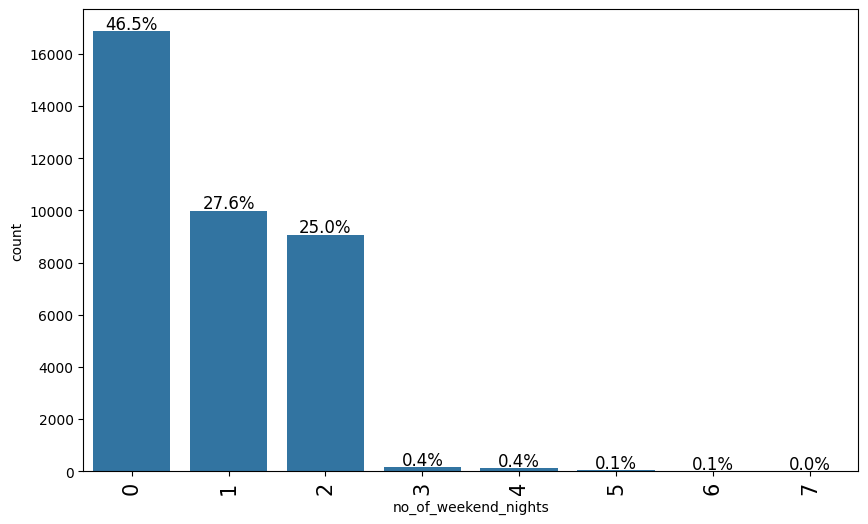

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

46.5% of the bookings don't include any weekend nights, and 27% and 25% for 1, 2 weekend nights respectively.

### 4.2. Bi-variate analysis

#### 4.2.1. Correlation matrix

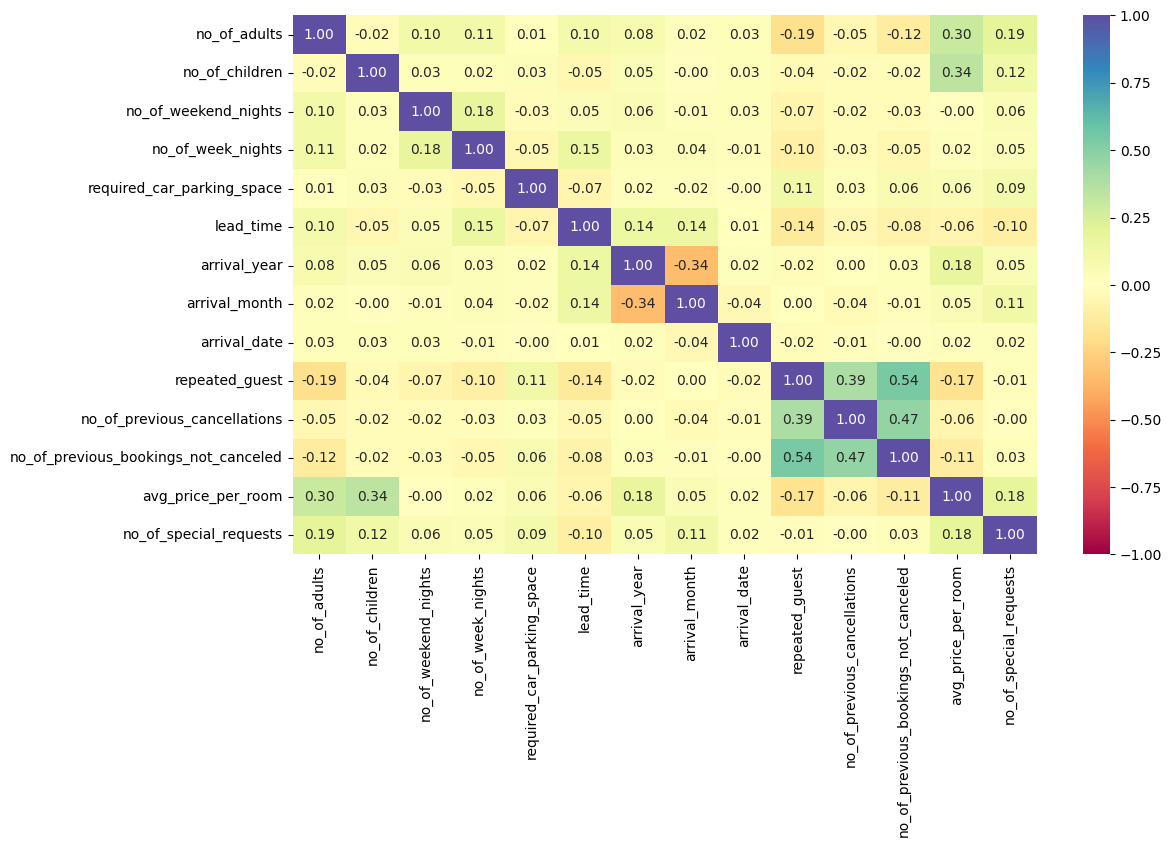

In [ ]:
# getting only the numeric datatypes columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
# creating heatmap
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

 * no_of_adults and avg_price_per_room have a moderate positive correlation (0.30), suggesting that rooms with more adults tend to have a higher average price.
 * no_of_children and avg_price_per_room also show a moderate positive correlation (0.34), indicating that bookings with children are associated with higher room prices.
 * lead_time has a weak positive correlation with arrival_year (0.14) and arrival_month (0.14), which is expected as bookings made further in advance would likely fall into later months or years.
 * repeated_guest has a strong negative correlation with no_of_previous_cancellations (-0.39) and a strong positive correlation with no_of_previous_bookings_not_canceled (0.54). This is intuitive: repeated guests are less likely to have previous cancellations and more likely to have previous successful bookings.
 * no_of_previous_cancellations and no_of_previous_bookings_not_canceled have a negative correlation (-0.47), which is also expected as guests with more previous cancellations are less likely to have many previous non-canceled bookings.
 * no_of_special_requests shows a weak positive correlation with avg_price_per_room (0.18). This might suggest that guests with special requests are slightly more likely to book higher-priced rooms.


#### 4.2.2. EDA question: what are the busiest months in the hotel?

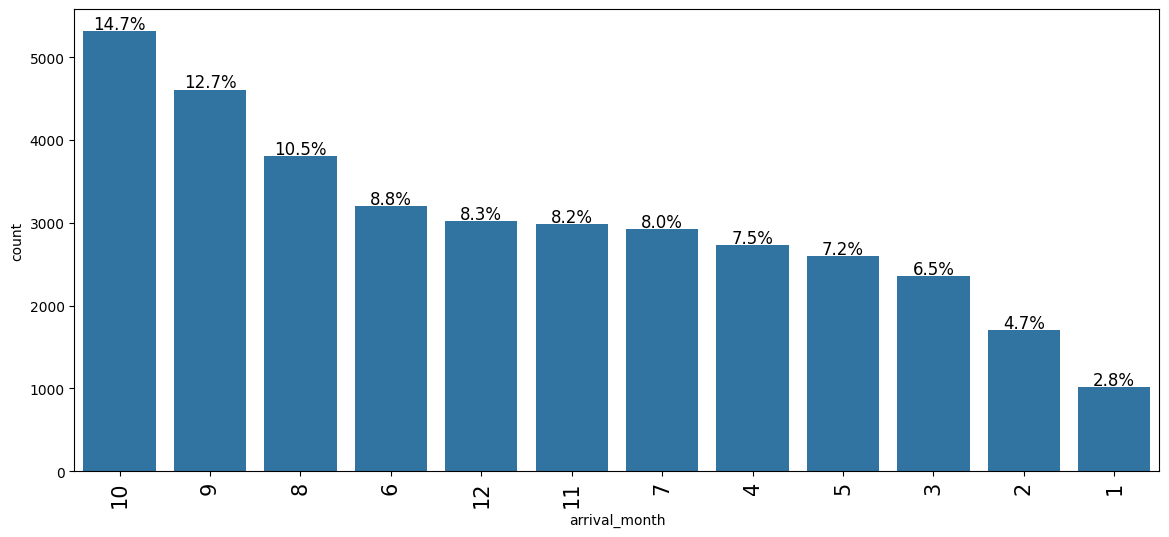

In [ ]:
# What are the busiest months in the hotel?
labeled_barplot(data, "arrival_month", perc=True)

The busiest months are in sequence: 10, 9, 8, 6. There's no dominance of one month over the other.

#### 4.2.3. EDA question: which market segment do most of the guests come from?

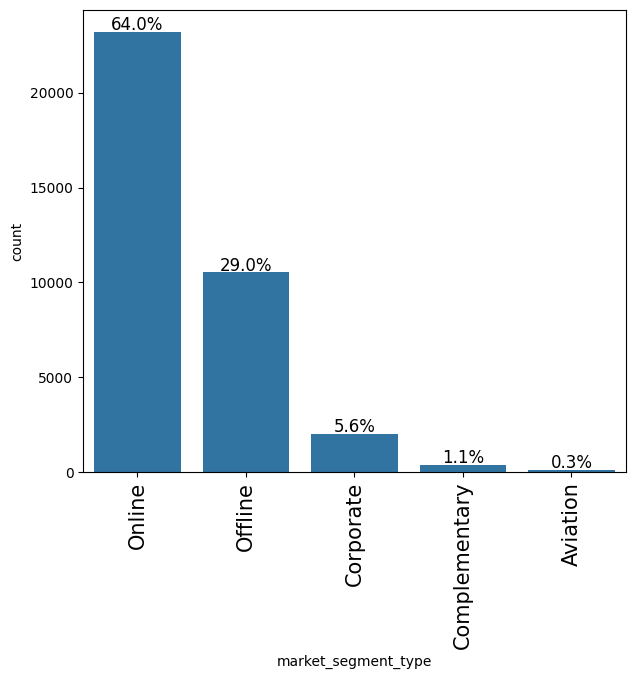

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

The "Online" market segment is the most dominant, accounting for a substantial 64.0% of all bookings.
The "Offline" segment is the second largest, but significantly smaller than "Online" at 29.0%.
The remaining segments, "Corporate" (5.6%), "Complementary" (1.1%), and "Aviation" (0.3%), represent a very small proportion of the total bookings.

#### 4.2.4. EDA question: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

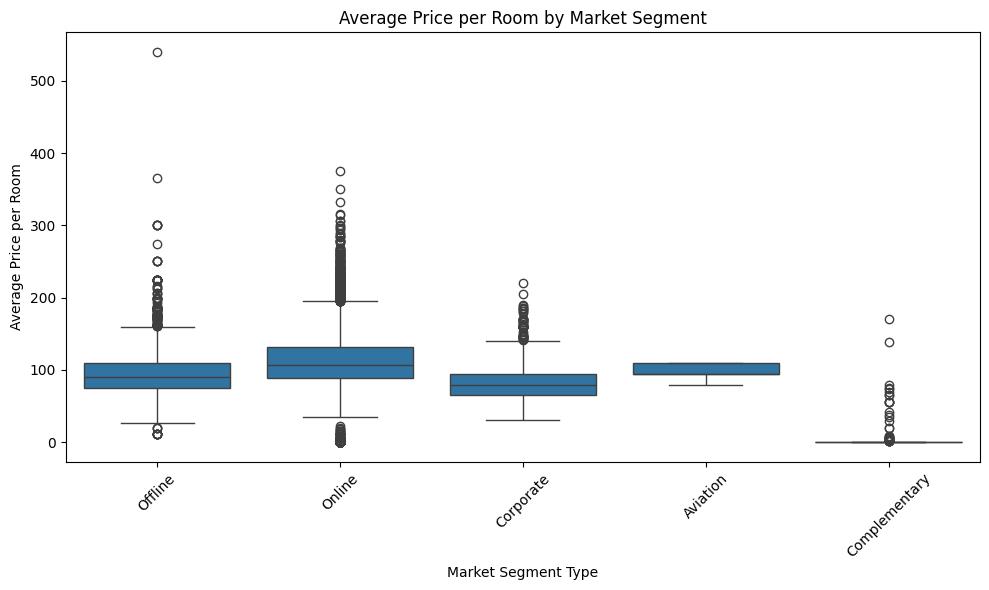

In [ ]:
# using a boxplot to analyze the question
plt.figure(figsize=(10, 6))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=data)
plt.xticks(rotation=45)
plt.title('Average Price per Room by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price per Room')
plt.tight_layout()
plt.show()

* The Online and Offline segments have a wide range of average room prices, with the Online segment showing a slightly higher median price and more outliers at the higher end.
* The Corporate segment has a tighter distribution of average prices, with a lower median compared to Online and Offline segments.
* The Aviation segment appears to have a very limited number of bookings, and the average price is around 100 Euros.
* The Complementary segment has the lowest average room prices, with a significant number of bookings at or near zero cost. This is expected for complementary bookings.


#### 4.2.5. EDA question: What percentage of bookings are canceled?

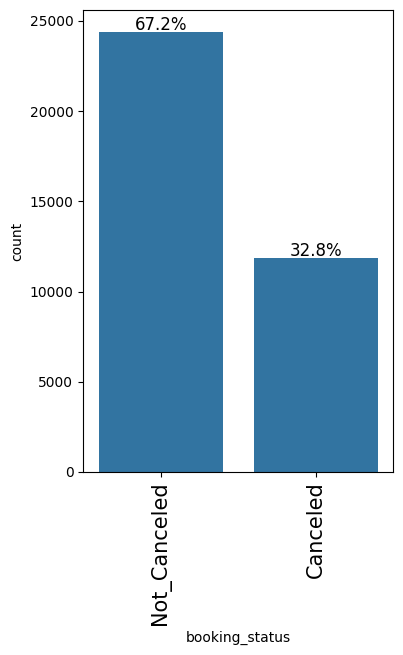

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

Cancelled bookings are almost half (32%) of the not_cancelled (67%). Target variable is inbalanced

#### 4.2.6. EDA question: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


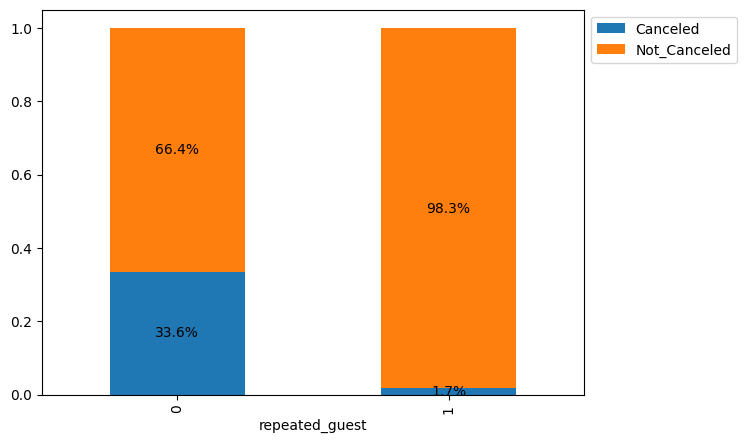

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status")

Cancellations from repeating guests are at 1.7%, most of the cancellations (66.4%) come from 1st-time guests

#### 4.2.7. EDA question: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


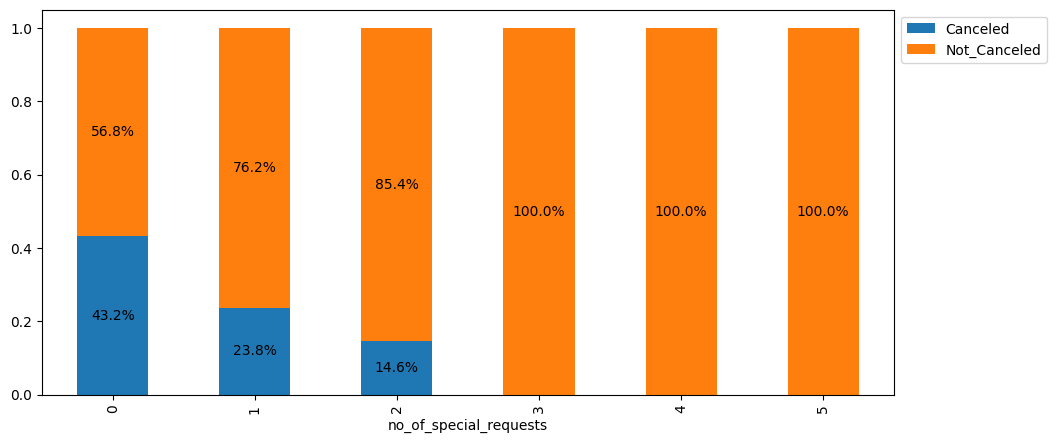

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

In 43.2% of the cancellations there were no special requests, and in 38.4% of the cancellations there were 1-2 special requests. So there doesn't seem to be an indication that the number of special requests influence the cancellation.

#### 4.2.8. Is there a positive correlation between booking status and average price per room

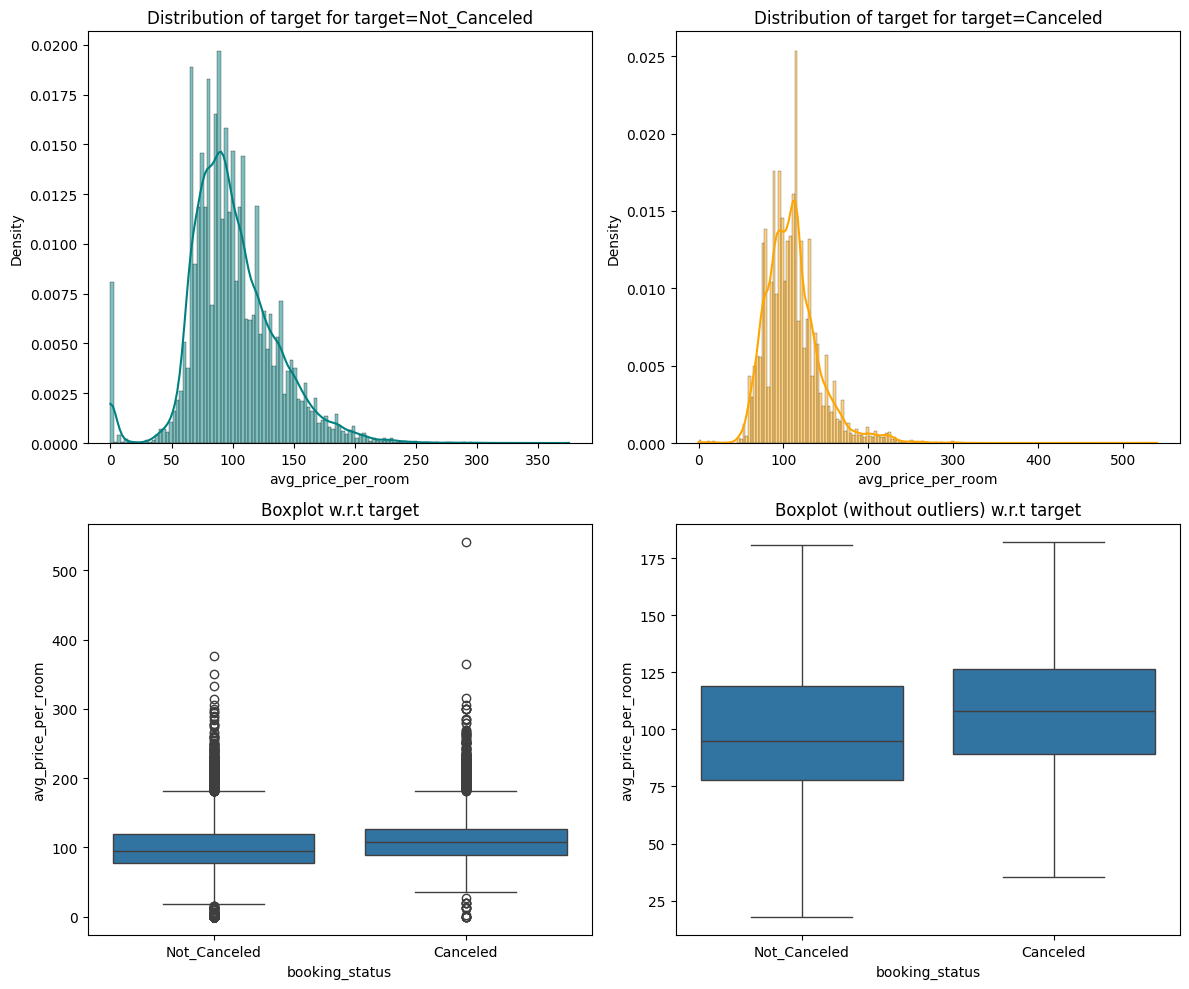

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

The median price for canceled bookings is slightly higher than for not-canceled ones. This suggests that people might be canceling more expensive bookings, possibly due to changing plans or finding a better deal.

#### 4.2.9. Is there a correlation between booking status and lead time?

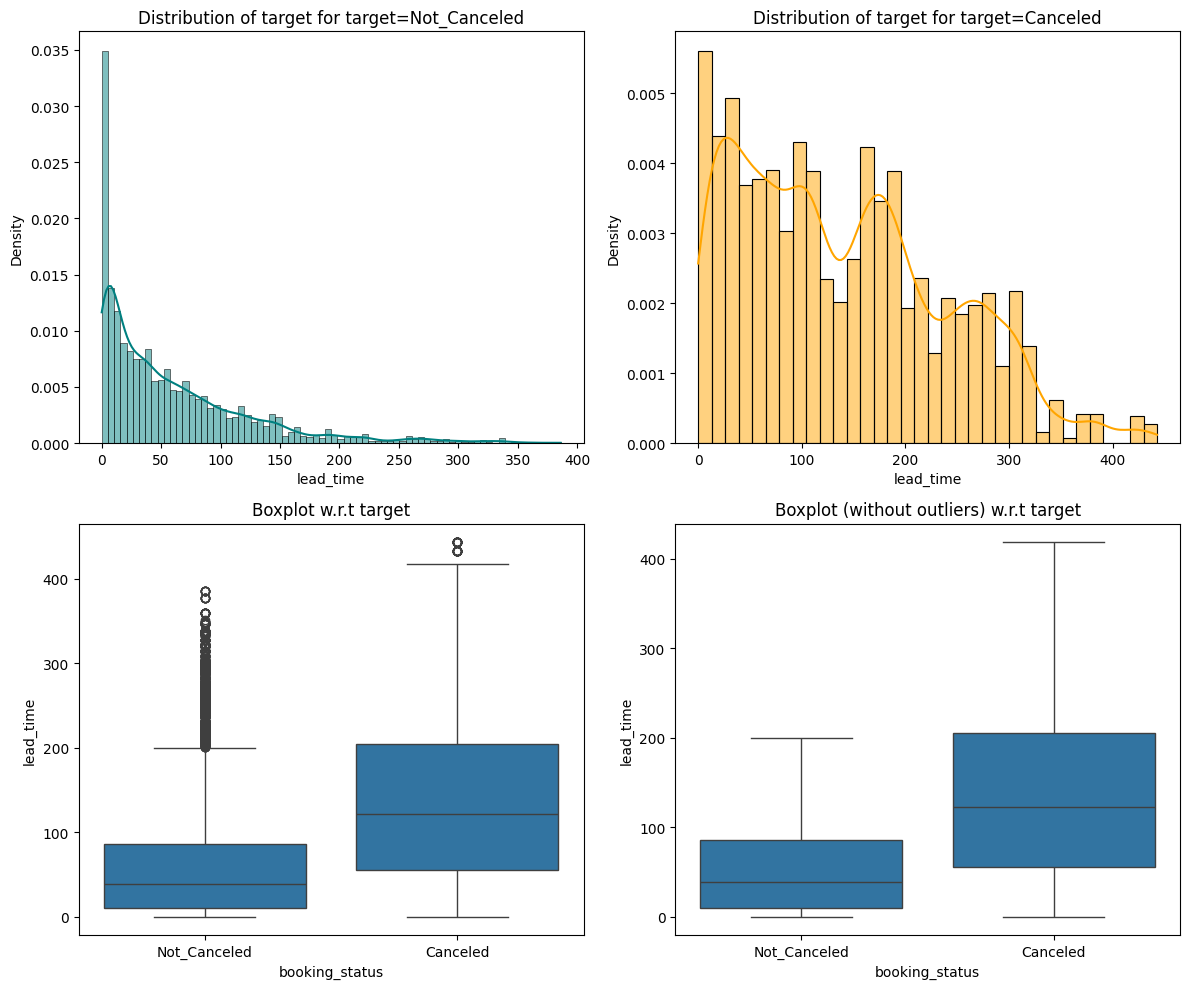

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

Plots show that bookings with a longer lead time are more likely to be canceled. The median lead time for canceled bookings is much higher than for those that were not canceled. This seems to indicate that lead_time is an important feature for our predictive model.

## 5. DATA PREPROCESSING

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### 5.1. Outlier detection and treatment (with rationale if needed))

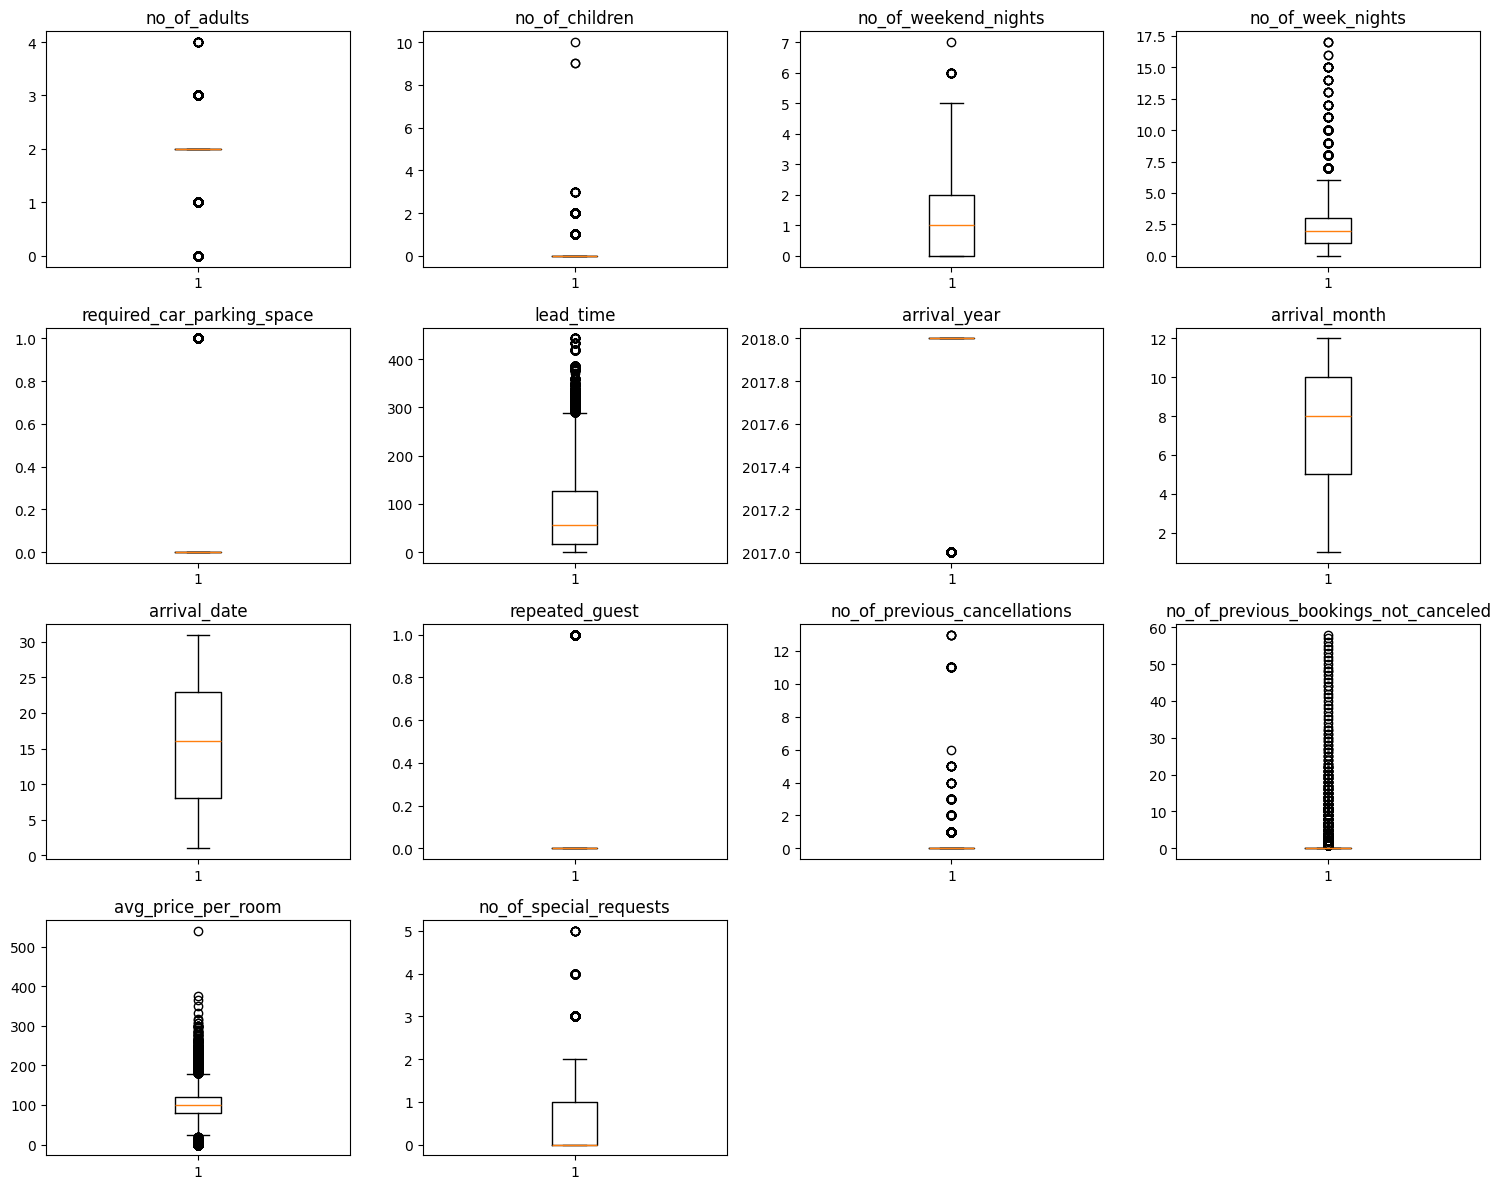

In [ ]:
# outlier detection using boxplots

# getting numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Several features, including no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, and avg_price_per_room, show the presence of outliers.

Some of these outliers, particularly in no_of_previous_cancellations and no_of_previous_bookings_not_canceled, represent guests with a history of many bookings or cancellations, which could be valuable information.

Outliers in avg_price_per_room could represent premium bookings or errors in data entry (like the 0 value we observed earlier).

---
**Outlier treatment reasoning:**

Given the sensitivity of our chosen models (KNN, Naive Bayes, and SVM) and the data scaling process, it is advisable to consider treating outliers. While some outliers might contain valuable information (like a history of cancellations), their presence can negatively impact the performance of KNN, SVM, and Naive Bayes. However, we will start by assessing model performance without treatment and then apply techniques like transformation or capping if needed to improve results.

### 5.2. Missing Value Treatment (with rationale if needed)

In [ ]:
# checking for missing values
data.isnull().sum()

print(f"The dataset has {data.isnull().sum().sum()} missing values.")

The dataset has 0 missing values.


Dataset doesn't have any missing values, so treatment won't be necessary.

### 5.3. Independent and dependent features

In [ ]:
#  defining the explanatory (independent) and response (dependent) features
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

### 5.4. Data scaling

In [ ]:
# Normalizing the numerical variables
num_columns = X.select_dtypes(include=[np.number]).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler
X[num_columns] = scaler.transform(X[num_columns])

Reasoning: we scale data because distance-based models like KNN and SVM are sensitive to feature scales. `StandardScaler` is used to standardize features by centering them to the mean and scaling to unit variance, which is a common and effective method for these models.

### 5.5. Feature Engineering (one-hot encoding)

In [ ]:
#  one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.298893,-0.26147,0.217401,-0.144803,-0.178819,1.614896,-2.137469,0.839242,-1.555662,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.298893,-0.26147,1.365993,0.563972,-0.178819,-0.933701,0.467843,1.164990,-1.098013,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.628975,-0.26147,1.365993,-0.853578,-0.178819,-0.980250,0.467843,-1.766747,1.419055,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.298893,-0.26147,-0.931190,-0.144803,-0.178819,1.463610,0.467843,-0.789501,0.503757,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.298893,-0.26147,0.217401,-0.853578,-0.178819,-0.433291,0.467843,-1.115250,-0.525952,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Reasoning: we use one-hot encoding in machine learning to convert nominal categorical data into a numerical format that algorithms can understand, ensuring no false ordinal relationships are implied and that each category is treated independently.

In [ ]:
# change the status of the target feature from True/False to 1/0
y = y.map({"Not_Canceled": 0, "Canceled": 1})

### 5.6. Train-Test split

In [ ]:
# Split data into 70% training and 30% temporary set (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=gbl_random_state, stratify=y, shuffle=True)

# Split the temporary set into 15% validation and 15% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=gbl_random_state, stratify=y_temp, shuffle=True)

# printing the shapes and percentages of classes in each set
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")
print("")
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Training set shape: (25392, 27)
Validation set shape: (5441, 27)
Testing set shape: (5442, 27)

Percentage of classes in training set:
booking_status
0    67.237713
1    32.762287
Name: proportion, dtype: float64 

Percentage of classes in test set:
booking_status
0    67.23631
1    32.76369
Name: proportion, dtype: float64


## 6. MODEL BUILDING

### 6.1. Model evaluation criterion

For this hotel booking cancellation problem, we should focus on Recall or F1-score.

* Recall: measures the percentage of actual cancellations that our model correctly identifies. A high recall is important to minimize missed cancellations, which directly impact hotel revenue.
* F1-score: This metric provides a balance between Precision (correctly predicted cancellations out of all predicted cancellations) and Recall. It's useful when you want a good overall performance on both identifying cancellations and avoiding false positives.

However, it's our understanding that it's more critical to catch every cancellation even if it means some false alarms, therefore we'll focus primarily on **Recall**.


### 6.2. functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # Check if the model has predict_proba attribute
    if hasattr(model, 'predict_proba'):
        # checking which probabilities are greater than threshold
        pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
        # rounding off the above values to get classes
        pred = np.round(pred_temp)
    else:
        # If predict_proba is not available, use predict
        pred = model.predict(predictors)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"accuracy": acc, "recall": recall, "precision": precision, "f1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model

def plot_confusion_matrix(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

        # Check if the model has predict_proba attribute
    if hasattr(model, 'predict_proba'):
        # checking which probabilities are greater than threshold
        pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
        # rounding off the above values to get classes
        pred = np.round(pred_temp)
    else:
        # If predict_proba is not available, use predict
        pred = model.predict(predictors)

    cm = confusion_matrix(target, pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

In [ ]:
# Function to train and evaluate a classification model, this will display the performance metrics and confusion matrix, and can be used against validation or test set

def model_train_and_evaluate(model, model_name, split, X_train, y_train, X_val_test, y_val_test):
    """
    Function to train and evaluate a classification model, this will display the performance metrics and confusion matrix, and can be used against validation or test set

    model: classifier
    X_train: independent variables for training
    y_train: dependent variable for training
    X_val_test: independent variables for validation or test split
    y_val_test: dependent variable for validation or test split
    """

    # ========================================
    # TRAINING dataset
    model.fit(X_train, y_train) # train model

    # classification performance for train data
    model_perf_train = model_performance_classification(model, X_train, y_train)
    display(Markdown("**Training performance**"))
    display(model_perf_train)

    # Append train metrics to models_comparison dataframe
    model_perf_train['model_name'] = model_name
    model_perf_train['split'] = 'train'
    global models_comparison
    models_comparison = pd.concat([models_comparison, model_perf_train], ignore_index=True)

    display(Markdown("**Training confusion matrix**"))
    plot_confusion_matrix(model, X_train, y_train) # create confusion matrix for train data
    print("-" * 120)


    # ========================================
    # VALIDATION or TEST dataset

    # classification performance for validation/test data
    model_perf_val_test = model_performance_classification(model, X_val_test, y_val_test)
    display(Markdown("**" + split.capitalize() +" performance**"))
    display(model_perf_val_test)

    # Append validation/test metrics to models_comparison dataframe
    model_perf_val_test['model_name'] = model_name
    model_perf_val_test['split'] = split
    models_comparison = pd.concat([models_comparison, model_perf_val_test], ignore_index=True)

    display(Markdown("**" + split.capitalize() +" confusion matrix**"))
    plot_confusion_matrix(model, X_val_test, y_val_test) # create confusion matrix for train data
    print("-" * 120)

In [ ]:
def models_comparison_reset():
    """
    Function to reset the models_comparison dataframe
    """
    global models_comparison
    models_comparison = pd.DataFrame(columns=["model_name", "split", "accuracy", "precision", "recall", "f1"])

In [ ]:
# Function to evaluate a previously trained model model, this will display the performance metrics and confusion matrix, and can be used against validation or test set

def model_evaluate(model, model_name, split, X_val_test, y_val_test):
    """
    Function to evaluate a previously trained model model, this will display the performance metrics and confusion matrix, and can be used against validation or test set

    model: classifier
    X_train: independent variables for training
    y_train: dependent variable for training
    X_val_test: independent variables for validation or test split
    y_val_test: dependent variable for validation or test split
    """

    # ========================================
    # VALIDATION or TEST dataset

    print("-" * 120)

    # global df storting the metrics from all models
    global models_comparison

    # classification performance for validation/test data
    model_perf_val_test = model_performance_classification(model, X_val_test, y_val_test)
    display(Markdown("**" + split.capitalize() +" performance**"))
    display(model_perf_val_test)

    # Append validation/test metrics to models_comparison dataframe
    model_perf_val_test['model_name'] = model_name
    model_perf_val_test['split'] = split
    models_comparison = pd.concat([models_comparison, model_perf_val_test], ignore_index=True)

    display(Markdown("**" + split.capitalize() +" confusion matrix**"))
    plot_confusion_matrix(model, X_val_test, y_val_test) # create confusion matrix for train data
    print("-" * 120)

### 6.3. KNN

**Training performance**

,accuracy,recall,precision,f1
0,0.914343,0.851184,0.883138,0.866867


**Training confusion matrix**

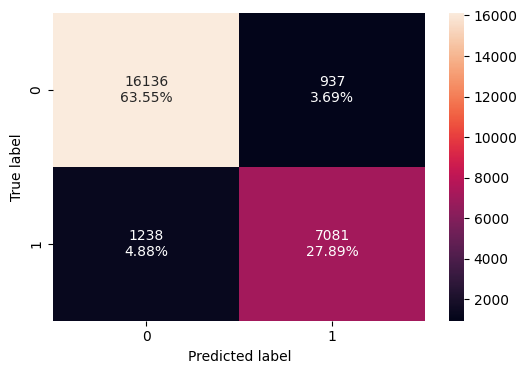

------------------------------------------------------------------------------------------------------------------------


**Validation performance**

,accuracy,recall,precision,f1
0,0.847455,0.750981,0.776232,0.763398


**Validation confusion matrix**

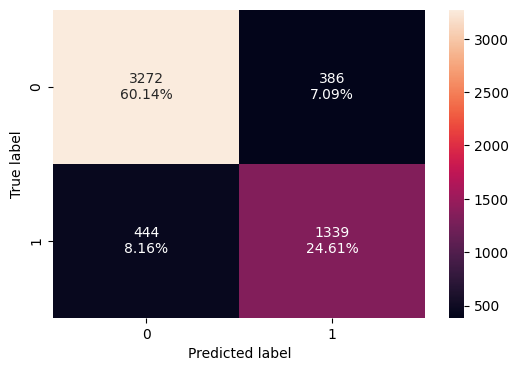

------------------------------------------------------------------------------------------------------------------------


In [ ]:
# instantiate knn model (k = 3)
knn_0 = KNeighborsClassifier(n_neighbors = 3)

# calling our Function to train and evaluate, display the performance metrics and confusion matrix
model_train_and_evaluate(knn_0, "knn_0 KNN k3", "validation", X_train, y_train, X_val, y_val)

### 6.4. Naive Bayes

**Training performance**

,accuracy,recall,precision,f1
0,0.409145,0.964419,0.35297,0.516796


**Training confusion matrix**

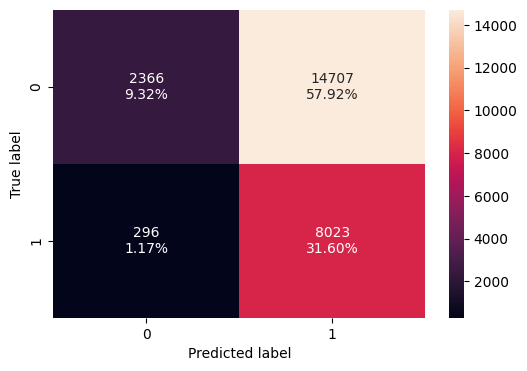

------------------------------------------------------------------------------------------------------------------------


**Validation performance**

,accuracy,recall,precision,f1
0,0.41077,0.970275,0.35429,0.519052


**Validation confusion matrix**

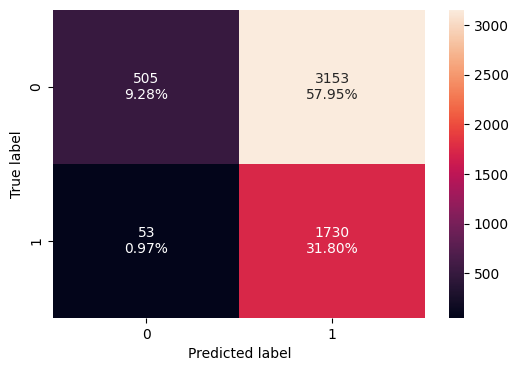

------------------------------------------------------------------------------------------------------------------------


In [ ]:
# instatiate Naive Bayes with default parameters
nb_0 = GaussianNB()

# calling our Function to train and evaluate, display the performance metrics and confusion matrix
model_train_and_evaluate(nb_0, "nb_0 NB default", "validation", X_train, y_train, X_val, y_val)

### 6.5. SVM

In [ ]:
# instatiate SVM model
svm_0 = SVC(kernel='linear', probability=True)

**Training performance**

,accuracy,recall,precision,f1
0,0.801552,0.606203,0.740964,0.666843


**Training confusion matrix**

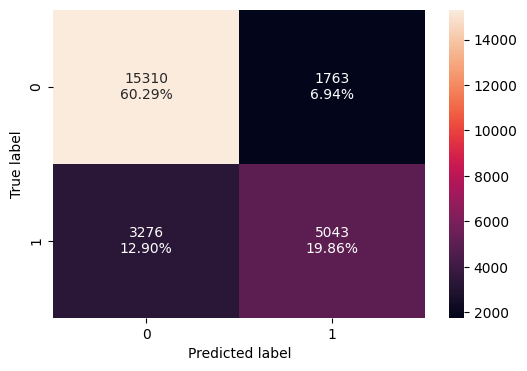

------------------------------------------------------------------------------------------------------------------------


**Validation performance**

,accuracy,recall,precision,f1
0,0.805183,0.62479,0.740199,0.677616


**Validation confusion matrix**

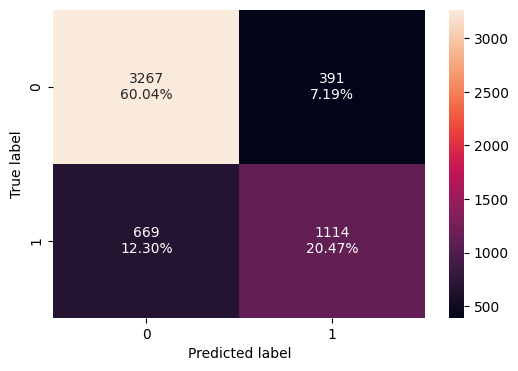

------------------------------------------------------------------------------------------------------------------------


In [ ]:
# calling our Function to train and evaluate, display the performance metrics and confusion matrix
model_train_and_evaluate(svm_0, "svm_0 SVM linear", "validation", X_train, y_train, X_val, y_val)

### 6.6. Model performance comments

In [ ]:
# checking performance of models built so far
models_comparison

,model_name,split,accuracy,precision,recall,f1
0,knn_0 KNN k3,train,0.914343,0.883138,0.851184,0.866867
1,knn_0 KNN k3,validation,0.847455,0.776232,0.750981,0.763398
2,nb_0 NB default,train,0.409145,0.352970,0.964419,0.516796
3,nb_0 NB default,validation,0.410770,0.354290,0.970275,0.519052
4,svm_0 SVM linear,train,0.801552,0.740964,0.606203,0.666843
5,svm_0 SVM linear,validation,0.805183,0.740199,0.624790,0.677616


The recall from all 3 models are close between training/validation set, which means they are generalizing well. Out of the 3 models built so far, the best performing model is the Naive Bayes, that just with the default parameters is giving a recall of 97% on the validation set. We'll use RandomizedSearchCV to tune the hyper-parameters for all of these base models.
The GridSearchCV would try all of them, which is time-consuming, instead, with RandomizedSearchCV, you can try only a randomly chosen subset of, say, 10 combinations.

## 7. MODEL PERFORMANCE IMPROVEMENT

### 7.1. KNN tunning

In [ ]:
# Define the parameter distribution to sample from
param_dist = {'n_neighbors': sp_randint(3, 20)} # sample n_neighbors from 3 to 20

# Instantiate the RandomizedSearchCV object
knn_random = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=gbl_num_iter, cv=gbl_cv, scoring=gbl_scoring, random_state=gbl_random_state)

# Fit the RandomizedSearchCV object to the training data
knn_random.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Number of combinations tested: {knn_random.n_iter}")
print("Best parameters found: ", knn_random.best_params_)
print("Best recall score found: ", knn_random.best_score_)

Number of combinations tested: 10
Best parameters found:  {'n_neighbors': 5}
Best recall score found:  0.7350654372311393


Displaying the 10 hyper-parameters combinations tested and their respective test scores

In [ ]:
# printing the hyper-parameters combinations tested and test scores
results = pd.DataFrame(knn_random.cv_results_)
results = results[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

# Display the results
display(results)

,params,mean_test_score,rank_test_score
9,{'n_neighbors': 5},0.735065,1
0,{'n_neighbors': 9},0.717153,2
4,{'n_neighbors': 9},0.717153,2
5,{'n_neighbors': 13},0.711263,4
6,{'n_neighbors': 13},0.711263,4
2,{'n_neighbors': 13},0.711263,4
1,{'n_neighbors': 17},0.702127,7
3,{'n_neighbors': 10},0.679168,8
8,{'n_neighbors': 10},0.679168,8
7,{'n_neighbors': 6},0.670033,10


**Training performance**

,accuracy,recall,precision,f1
0,0.892407,0.811636,0.852848,0.831732


**Training confusion matrix**

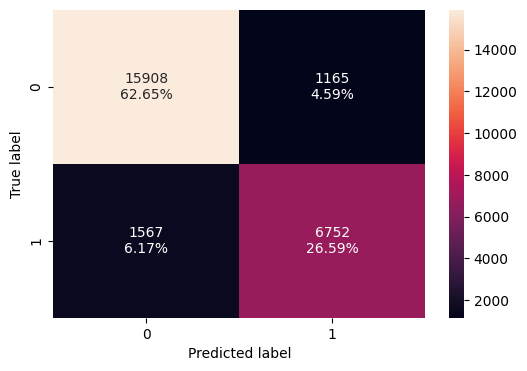

------------------------------------------------------------------------------------------------------------------------


**Validation performance**

,accuracy,recall,precision,f1
0,0.852049,0.751542,0.787309,0.76901


**Validation confusion matrix**

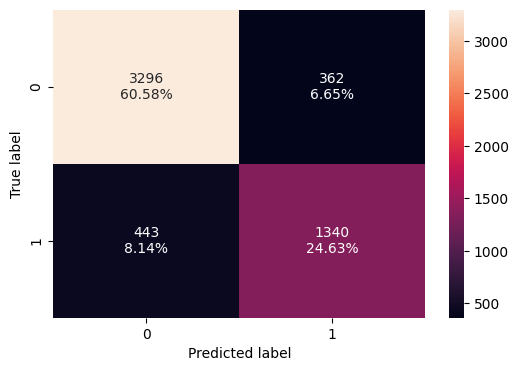

------------------------------------------------------------------------------------------------------------------------


In [ ]:
# creating a tuned knn model to use the best params from the randomSearchCV
knn_tuned = KNeighborsClassifier(n_neighbors = knn_random.best_params_['n_neighbors'])

# calling our function to train and evaluate and display metrics and confusion matrix
model_train_and_evaluate(knn_tuned, "knn_tuned KNN tunned", "validation", X_train, y_train, X_val, y_val)

### 7.2. Naive Bayes tunning

In [ ]:
# Define the parameter distribution to sample from for GaussianNB
# var_smoothing is a small value added to the variances for calculation stability
param_dist = {'var_smoothing': loguniform(1e-9, 1e-2)} # Example: sample var_smoothing on a log scale

# Instantiate the RandomizedSearchCV object
nb_random = RandomizedSearchCV(GaussianNB(), param_distributions=param_dist, n_iter=gbl_num_iter, cv=gbl_cv, scoring=gbl_scoring, random_state=gbl_random_state)

# Fit the RandomizedSearchCV object to the training data
nb_random.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Number of combinations tested: {nb_random.n_iter}")
print("Best parameters found: ", nb_random.best_params_)
print("Best recall score found: ", nb_random.best_score_)

Number of combinations tested: 10
Best parameters found:  {'var_smoothing': np.float64(2.5502648504032875e-09)}
Best recall score found:  0.9670629712290115


Displaying the 10 hyper-parameters combinations tested and their respective test scores

In [ ]:
# printing the hyper-parameters combinations tested and test scores
results = pd.DataFrame(nb_random.cv_results_)
results = results[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

# Display the results
display(results)

,params,mean_test_score,rank_test_score
6,{'var_smoothing': 2.5502648504032875e-09},0.967063,1
4,{'var_smoothing': 1.2363188277052231e-08},0.965861,2
5,{'var_smoothing': 1.2358382772306953e-08},0.965861,2
1,{'var_smoothing': 0.004518560951024112},0.964779,4
0,{'var_smoothing': 4.185822729546971e-07},0.964659,5
3,{'var_smoothing': 1.5509913987594322e-05},0.964539,6
7,{'var_smoothing': 0.0011567327199145992},0.964539,6
8,{'var_smoothing': 1.6136341713591338e-05},0.964539,6
2,{'var_smoothing': 0.00013303245101522923},0.964419,9
9,{'var_smoothing': 9.047071957568402e-05},0.964419,9


**Training performance**

,accuracy,recall,precision,f1
0,0.409223,0.964419,0.353001,0.516829


**Training confusion matrix**

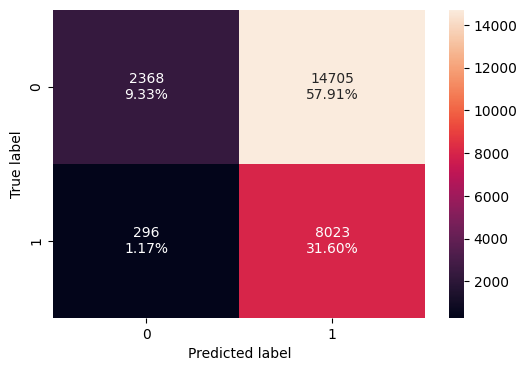

------------------------------------------------------------------------------------------------------------------------


**Validation performance**

,accuracy,recall,precision,f1
0,0.41077,0.970275,0.35429,0.519052


**Validation confusion matrix**

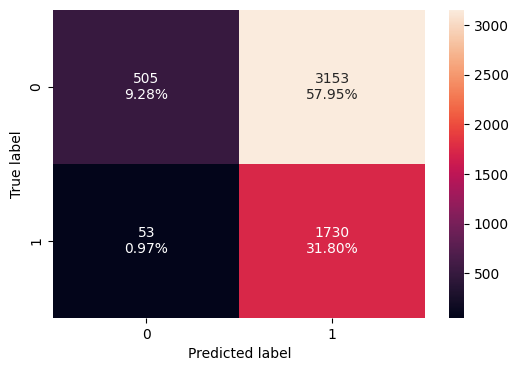

------------------------------------------------------------------------------------------------------------------------


In [ ]:
# creating a NB model to use the best hyper-parameters found by RandomizedSearchCV
nb_tuned = GaussianNB(var_smoothing = nb_random.best_params_['var_smoothing'])

# calling our function to train and evaluate and display metrics and confusion matrix
model_train_and_evaluate(nb_tuned, "nb_tuned NB tuned", "validation", X_train, y_train, X_val, y_val)

### 7.3. SVM tunning (10 hyper-parameters combinations will be tested, rubric requested at least 5)

In [ ]:

# Define the parameter distribution to sample from for SVC
param_dist = {
    'C': loguniform(1e-3, 1e3),  # Regularization parameter
    'gamma': loguniform(1e-4, 1e2), # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly'], # Kernel type
    'degree': sp_randint(1, 5) # Degree for the 'poly' kernel, sampling integers between 1 and 5
}

# Instantiate the RandomizedSearchCV object
svm_random = RandomizedSearchCV(SVC(probability=True), param_distributions=param_dist, n_iter=gbl_num_iter, cv=gbl_cv, scoring=gbl_scoring, random_state=gbl_random_state)

# Fit the RandomizedSearchCV object to the training data
svm_random.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Number of combinations tested: {svm_random.n_iter}")
print("Best parameters found: ", svm_random.best_params_)
print("Best recall score found: ", svm_random.best_score_)

Number of combinations tested: 10
Best parameters found:  {'C': np.float64(0.5450293694558254), 'degree': 3, 'gamma': np.float64(0.5132347525675524), 'kernel': 'poly'}
Best recall score found:  0.7216011523428466


Displaying the 10 hyper-parameters combinations tested and their respective test scores

In [ ]:
# printing the hyper-parameters combinations tested and test scores
results = pd.DataFrame(svm_random.cv_results_)
results = results[['params', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

# Display the results
display(results)

,params,mean_test_score,rank_test_score
7,"{'C': 0.5450293694558254, 'degree': 3, 'gamma'...",0.721601,1
2,"{'C': 0.5694995061301531, 'degree': 1, 'gamma'...",0.602476,2
8,"{'C': 793.2047656808546, 'degree': 1, 'gamma':...",0.601995,3
9,"{'C': 12.073834860996039, 'degree': 1, 'gamma'...",0.580718,4
3,"{'C': 0.0013289448722869186, 'degree': 2, 'gam...",0.538647,5
0,"{'C': 0.1767016940294795, 'degree': 1, 'gamma'...",0.462557,6
6,"{'C': 0.055895242052179224, 'degree': 3, 'gamm...",0.049045,7
1,"{'C': 3.8115440886530614, 'degree': 2, 'gamma'...",0.000000,8
4,"{'C': 0.018794668241638456, 'degree': 4, 'gamm...",0.000000,8
5,"{'C': 0.06690421166498801, 'degree': 2, 'gamma...",0.000000,8


In [ ]:
# creating a SVM model to use the best hyper-parameters found by RandomizedSearchCV
svm_tuned = SVC(C = svm_random.best_params_['C'],
                gamma = svm_random.best_params_['gamma'],
                kernel = svm_random.best_params_['kernel'],
                degree = svm_random.best_params_['degree'])


**Training performance**

,accuracy,recall,precision,f1
0,0.865233,0.748888,0.823747,0.784536


**Training confusion matrix**

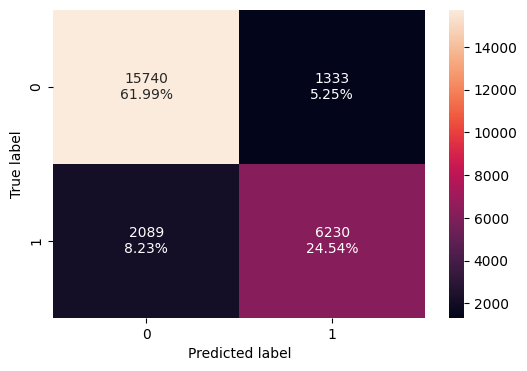

------------------------------------------------------------------------------------------------------------------------


**Validation performance**

,accuracy,recall,precision,f1
0,0.846352,0.720135,0.792104,0.754407


**Validation confusion matrix**

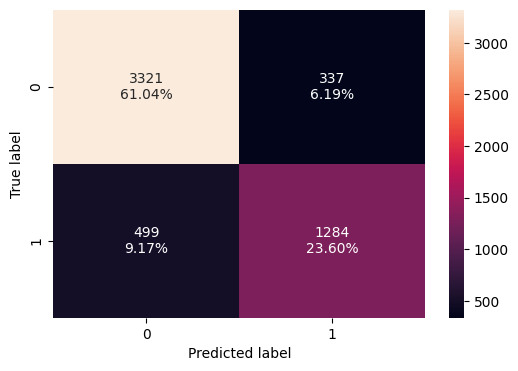

------------------------------------------------------------------------------------------------------------------------


In [ ]:
# calling our function to train and evaluate and display metrics and confusion matrix
model_train_and_evaluate(svm_tuned, "svm_tuned SVM tuned", "validation", X_train, y_train, X_val, y_val)

## 8. MODEL PERFORMANCE COMPARISON AND FINAL MODEL SELECTION

In [ ]:
# checking the dataframe with the performance from all the models
models_comparison

,model_name,split,accuracy,precision,recall,f1
0,knn_0 KNN k3,train,0.914343,0.883138,0.851184,0.866867
1,knn_0 KNN k3,validation,0.847455,0.776232,0.750981,0.763398
2,nb_0 NB default,train,0.409145,0.352970,0.964419,0.516796
3,nb_0 NB default,validation,0.410770,0.354290,0.970275,0.519052
4,svm_0 SVM linear,train,0.801552,0.740964,0.606203,0.666843
5,svm_0 SVM linear,validation,0.805183,0.740199,0.624790,0.677616
6,knn_tuned KNN k5,train,0.892407,0.852848,0.811636,0.831732
7,knn_tuned KNN k5,validation,0.852049,0.787309,0.751542,0.769010
8,nb_tuned NB tuned,train,0.409223,0.353001,0.964419,0.516829
9,nb_tuned NB tuned,validation,0.410770,0.354290,0.970275,0.519052


We'll select the Naive Bayes classifier with default parameters as our final model. It's the best choice because of its superior recall (97% on the validation set), which is our primary metric. The model generalizes well, with very similar training and validation scores, and its operational simplicity allows us to avoid the time and resources of hyperparameter tuning.

In [ ]:
# assigining the best model to a variable
best_model = nb_0

We'll proceed to evaluate the final model against the test dataset.

------------------------------------------------------------------------------------------------------------------------


**Test performance**

,accuracy,recall,precision,f1
0,0.404263,0.954571,0.34999,0.512188


**Test confusion matrix**

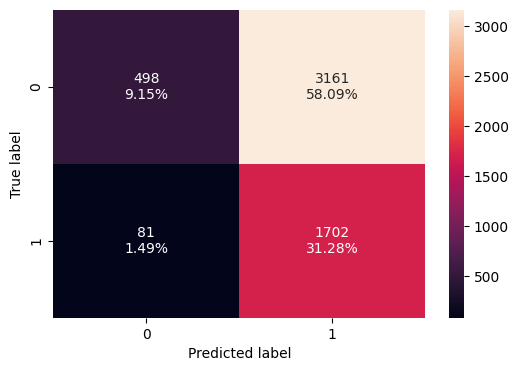

------------------------------------------------------------------------------------------------------------------------


In [ ]:
model_evaluate(best_model, "nb_0 NB default", "test", X_test, y_test)

Our chosen model demonstrates robust performance with recall scores of 96%, 97%, and 95% on the training, validation, and test datasets, respectively. The consistency across these sets indicates strong generalization and that the model is not overfitting. While the hyperparameters were tuned with 10 combinations, the improvement was marginal.

For future iterations, we can explore additional techniques to enhance performance, such as addressing the target variable imbalance or evaluating alternative algorithms. However, the current model's performance is sufficient to provide a viable solution for the stated business problem.

## 9. ACTIONABLE INSIGHTS AND RECOMMENDATIONS

**1\. Actionable Insights from Analysis & Model Performance**

The analysis of the hotel booking data has revealed several key insights that are directly supported by the performance of our chosen predictive model.

-   **Lead Time is the Strongest Predictor**: The Naive Bayes model's superior performance, with a **97% recall rate**, validates our finding that `lead_time` is the single most influential factor in predicting cancellations. This strong correlation is a key driver of the model's high predictive power.

-   **First-Time Guests are a High-Risk Segment**: The data shows that **66.4% of cancellations come from first-time guests**. The model, with its robust generalization across training, validation, and test datasets, is highly effective at identifying these high-risk bookings.

-   **Target Variable Imbalance is Managed**: While the target variable is imbalanced (32% canceled bookings), our focus on `Recall` has successfully addressed this challenge. The Naive Bayes model's strong performance across all datasets (**96%, 97%, and 95% recall** on training, validation, and test sets, respectively) demonstrates that it can reliably identify cancellations despite the data's imbalance.

-   **Model Simplicity for Immediate Deployment**: The model's consistently strong performance without extensive hyperparameter tuning means it's ready for immediate use. This operational simplicity allows INN Hotels to quickly implement data-driven cancellation policies.


**2\. Actionable Business Recommendations**

Based on these validated insights, here are data-driven recommendations for INN Hotels Group to reduce cancellations and improve revenue management.

2.1. Implement a Dynamic, Lead-Time-Based Cancellation Policy

Leverage the model's high recall score to implement a tiered cancellation policy. For bookings with a long lead time, identified as high-risk by the model, consider requiring a **non-refundable deposit**. This financial commitment will deter non-serious bookings and reduce last-minute no-shows.

2.2. Proactively Engage High-Risk, First-Time Guests

Use the predictive model to automatically flag high-risk bookings from first-time guests. Implement a proactive communication strategy for this segment, such as sending personalized pre-arrival messages or a small welcome offer to build a stronger connection and increase booking commitment.

2.3. Optimize Revenue with Strategic Overbooking

The model's strong generalization and high recall rate (**95% on the test set**) give INN Hotels the confidence to implement a controlled overbooking strategy on days with a high number of predicted cancellations. This can help recoup revenue that would otherwise be lost to no-shows.

2.4. Future Work

While the current model provides a strong foundation, future work could include:

-   **Exploring advanced algorithms**: Investigate whether more complex models like gradient boosting or neural networks can yield further performance improvements, though the marginal gains from tuning the current model suggest this may not be a high priority.

-   **Addressing the imbalanced dataset**: Although the model performs well, we can still experiment with techniques like SMOTE or different class weights to see if they offer a significant boost to performance.